In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

print("OpenCV version",cv2.__version__)

OpenCV version 3.3.0


In [2]:
def img_find_max_min(animg):
    _max = [0,0,0]
    _min = [0,0,0]
    for i in range(animg.shape[0]):
        for j in range(animg.shape[1]):
            for k in range(animg.shape[2]):
                _max[k] = max(animg[i,j,k],_max[k])
                _min[k] = min(animg[i,j,k],_min[k])
    print("maxval",_max,"minval",_min)

In [3]:
def img_invert_color(img):
    iimg = cv2.split(img);
    iimg = cv2.merge((iimg[2],iimg[1],iimg[0]))
    return iimg

In [4]:
def img_cut_border(img,l,r,t,d):
    img = img[l:img.shape[0]-r,t:img.shape[1]-d]
    if img.shape[0]%2==1:
        img = img[0:img.shape[0]-1,0:img.shape[1]]
    if img.shape[1]%2==1:
        img = img[0:img.shape[0],0:img.shape[1]-1]
    return img

In [5]:
def img_read_and_cut(path,mLeft,mRight,mTop,mBottom): 
    return img_cut_border(cv2.imread(path)[0:1000,1000:1200],0,0,0,0)

In [6]:
def img_to_plot(img,title):
    return {"source":img,"title":title}

In [7]:
def img_plot(fig_size,imgs):
    i=1
    plt.figure(figsize=fig_size)
    for img in imgs:
        plt.subplot(1,len(imgs),i)
        plt.title(img["title"])
        plt.imshow(img_invert_color(img["source"]))
        plt.xticks([]), plt.yticks([])
        if i==3: 
            plt.show()
            return
        else: i = i+1
    plt.show()
    
def img_plot_gray(fig_size,imgs):
    i=1
    plt.figure(figsize=fig_size)
    for img in imgs:
        plt.subplot(1,len(imgs),i)
        plt.title(img["title"])
        plt.imshow(img["source"], cmap="gray")
        plt.xticks([]), plt.yticks([])
        if i==3: 
            plt.show()
            return
        else: i = i+1
    plt.show()

(720, 200, 3)
maxval [254, 253, 255] minval [0, 0, 0]


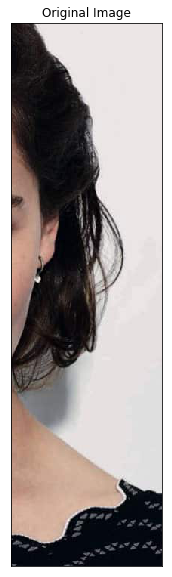

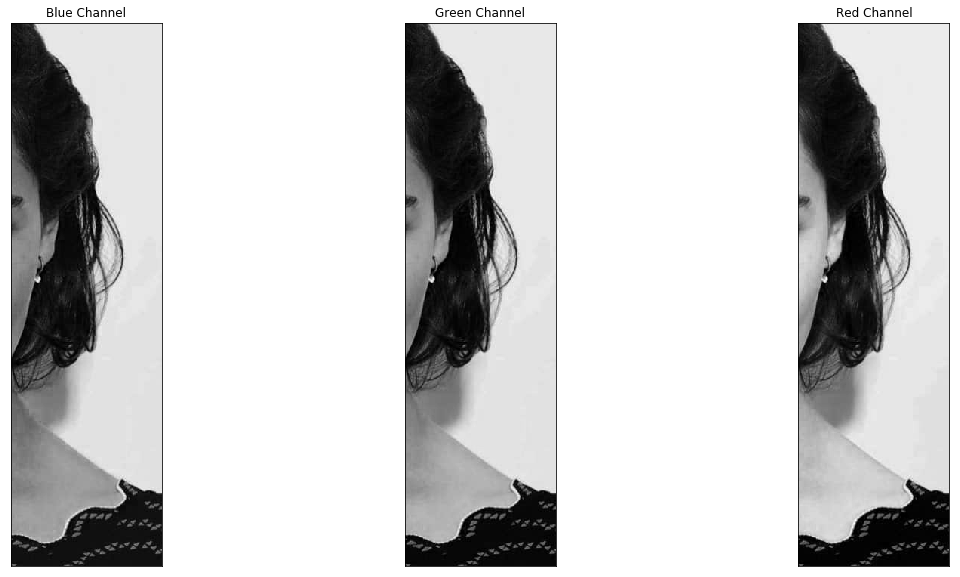

In [8]:
img = img_read_and_cut('C:\\Users\\Mauro\Desktop\\ec.jpg',0,0,0,0)
print(img.shape)
img_find_max_min(img)
img_plot((20,10),[img_to_plot(img,"Original Image")])
b,g,r = cv2.split(img)
img_plot_gray((20,10),[img_to_plot(b,"Blue Channel"),img_to_plot(g,"Green Channel"),img_to_plot(r,"Red Channel")])

In [9]:
def getPattern(offset_r,offset_c,img):
    H = img.shape[0]
    W = img.shape[1]    
    P = np.zeros((W,H))
    pr = [float((x+offset_r)%2) for x in range(2)]
    pr = np.tile(pr,int((W/2)))
    P = [pr*(i+offset_c)%2  for i in range(H)]
    return np.array(P)
    
%time r_pattern = getPattern(1,1,img)
%time b_pattern = getPattern(0,0,img)
%time g_pattern = getPattern(0,1,img)+getPattern(1,0,img)

Wall time: 11.5 ms
Wall time: 9 ms
Wall time: 24 ms


Wall time: 2 ms
Wall time: 1e+03 µs
Wall time: 1 ms


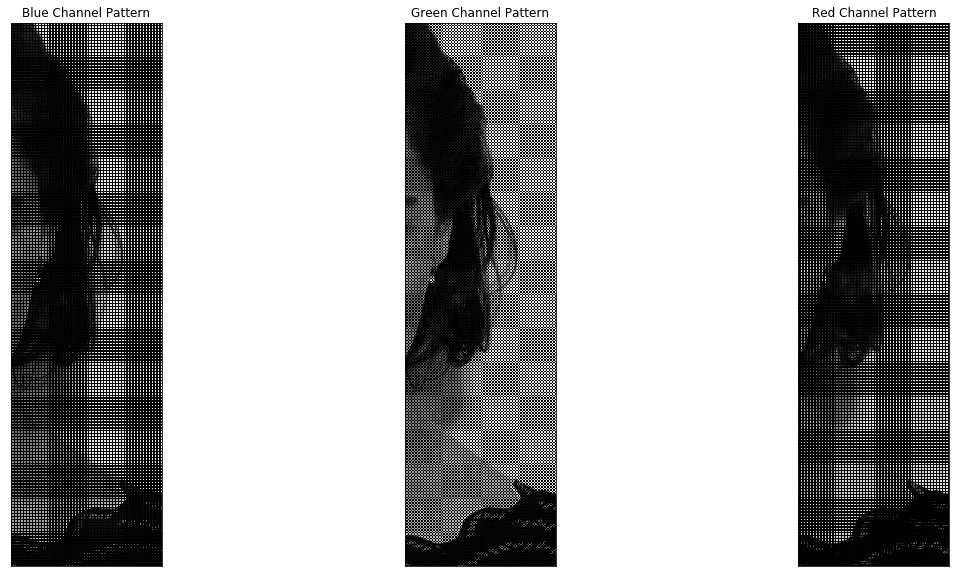

True

In [10]:
%time bp_r = r_pattern*r
%time bp_g = g_pattern*g
%time bp_b = b_pattern*b

img_plot_gray((20,10),[img_to_plot(bp_b,"Blue Channel Pattern"),img_to_plot(bp_g,"Green Channel Pattern"),img_to_plot(bp_r,"Red Channel Pattern")])
#img_plot_gray((20,10),[img_to_plot(bp_b,"Blue Channel Pattern")])
#img_plot_gray((20,10),[img_to_plot(bp_g,"Green Channel Pattern")])
#img_plot_gray((20,10),[img_to_plot(bp_r,"Red Channel Pattern")])

cv2.imwrite("PATTERNBLUE.jpg",bp_b)
cv2.imwrite("PATTERNGREEN.jpg",bp_g)
cv2.imwrite("PATTERRED.jpg",bp_r)

In [11]:
def fill_cross(matrix,shift_r,shift_c):
    
    matrixb = np.copy(matrix)
    
    irange = range(shift_r,matrix.shape[0]-1,2)
    jrange = range(shift_c,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i,j] = (matrix[i+1,j+1] + matrix[i+1,j-1] + matrix[i-1,j+1] + matrix[i-1,j-1])/4
    return matrixb

Wall time: 83.1 ms
Wall time: 51 ms
Wall time: 0 ns


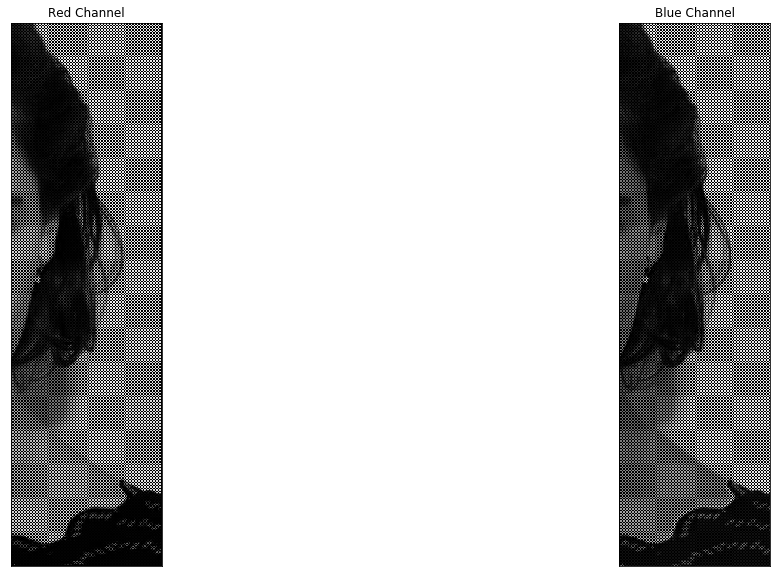

In [12]:
%time fc_bp_r = fill_cross(bp_r,1,1)
%time fc_bp_b = fill_cross(bp_b,2,2)
%time fc_bp_g = bp_g

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Red Channel")
plt.imshow(fc_bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.title("Blue Channel")
plt.imshow(fc_bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.show()


In [13]:
def fill_diag(matrix,shift_rp,shift_rd,shift_c_rp,shift_c_rd):
    
    matrixb = np.copy(matrix)
    
    irange = range(shift_rp,matrix.shape[0]-1,2)
    jrange = range(shift_c_rp,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i][j] = (matrix[i+1][j]+ matrix[i-1][j]+ matrix[i][j+1]+ matrix[i][j-1])/4
            
    irange = range(shift_rd,matrix.shape[0]-1,2)
    jrange = range(shift_c_rd,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i][j] = (matrix[i+1][j]+ matrix[i-1][j]+ matrix[i][j+1]+ matrix[i][j-1])/4
            
    return matrixb

Wall time: 189 ms
Wall time: 127 ms
Wall time: 167 ms


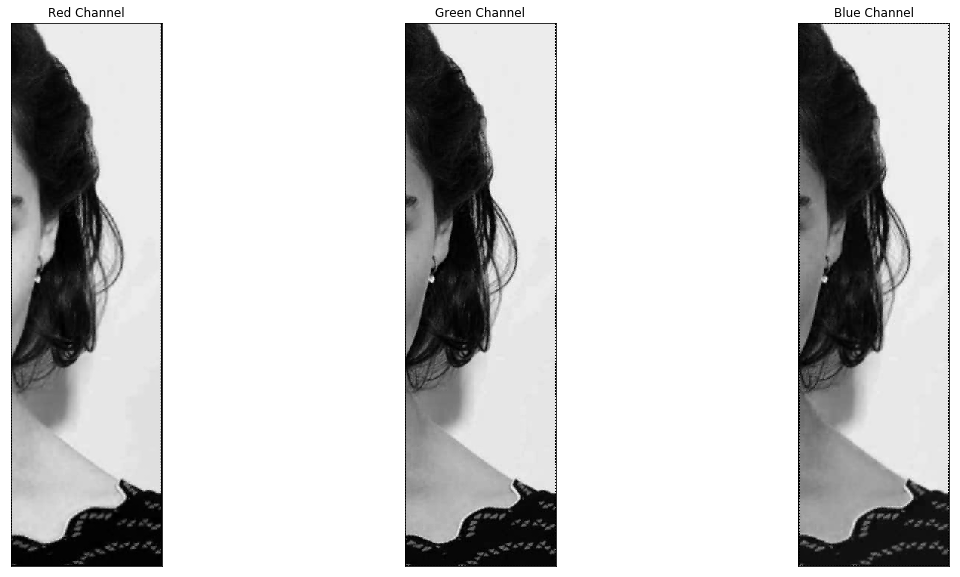

In [14]:
%time fd_bp_r = fill_diag(fc_bp_r,1,2,2,1)
%time fd_bp_b = fill_diag(fc_bp_b,2,3,3,2)
%time fd_bp_g = fill_diag(fc_bp_g,1,2,1,2)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Red Channel")
#plt.imshow(r, cmap="Reds")
plt.imshow(fd_bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,2)
plt.title("Green Channel")
#plt.imshow(g, cmap="Greens")
plt.imshow(fd_bp_g, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,3)
plt.title("Blue Channel")
#plt.imshow(b, cmap="Blues")
plt.imshow(fd_bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

maxval [247, 249, 255] minval [0, 0, 0]


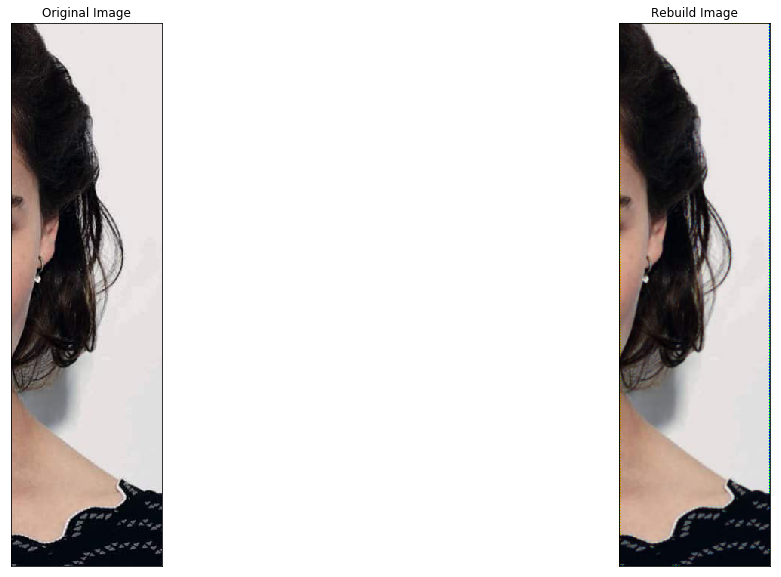

In [15]:
Ricostruzione = cv2.merge((fd_bp_b,fd_bp_g,fd_bp_r))
Ricostruzione = Ricostruzione.astype(np.uint8)
img_find_max_min(Ricostruzione)


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_invert_color(img))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,2,2)
plt.title("Rebuild Image")
plt.imshow(img_invert_color(Ricostruzione))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [16]:
Seconda = np.zeros((img.shape[0],img.shape[1],img.shape[2]))

irange = range(img.shape[0]-2)[2:]
jrange = range(img.shape[1]-2)[2:]

alpha = (1.0/2)
beta = (5.0/8)
gamma = (3.0/4)

for i in irange:
    for j in jrange:
        if (i+1)%2 is 0:
            if (j+1)%2 is 0:
                #print(i,j)
                #BLUE@BLUE
                Seconda[i][j][0] = fd_bp_b[i][j]
                DeltaBlue = fd_bp_b[i][j]-(1.0/4)*(fd_bp_b[i+2][j]+fd_bp_b[i-2][j]+fd_bp_b[i][j+2]+fd_bp_b[i][j-2])
                #GREEN@BLUE
                #if fd_bp_g[i][j]+1*(alpha)*DeltaBlue <=255 and fd_bp_g[i][j]+1*(alpha)*DeltaBlue>=0:
                Seconda[i][j][1] = fd_bp_g[i][j]+1*(alpha)*DeltaBlue #+1db ch-green ma compaiono puntini verdi
                #RED@BLUE
                #if fd_bp_r[i][j]+1*(gamma)*DeltaBlue <=255 and fd_bp_r[i][j]+1*(gamma)*DeltaBlue>=0:
                Seconda[i][j][2] = fd_bp_r[i][j]+1*(gamma)*DeltaBlue #-0.06 ch-red e problemi al cappello
                
            if (j+1)%2 is 1: 
                #print(i,j)
                #GREEN@GREEN
                Seconda[i][j][1] = fd_bp_g[i][j]
                DeltaGreen = fd_bp_g[i][j]-(1.0/4)*(fd_bp_g[i+2][j]+fd_bp_g[i-2][j]+fd_bp_g[i][j+2]+fd_bp_g[i][j-2])
                #BLUE@GREEN@BLUEROW
                #if fd_bp_b[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_b[i][j]+1*(beta)*DeltaGreen>=0:
                Seconda[i][j][0] = fd_bp_b[i][j]+1*(beta)*DeltaGreen #+0.7db ch-blue
                #RED@GREEN@BLUEROW
                #if fd_bp_r[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_r[i][j]+1*(beta)*DeltaGreen>=0:
                Seconda[i][j][2] = fd_bp_r[i][j]+1*(beta)*DeltaGreen #-0.06 ch-red problemi al cappello
                
        if (i+1)%2 is 1:
            if (j+1)%2 is 0:
                #print(i,j)
                #GREEN@GREEN
                Seconda[i][j][1] = fd_bp_g[i][j]
                DeltaGreen = fd_bp_g[i][j]-(1.0/4)*(fd_bp_g[i+2][j]+fd_bp_g[i-2][j]+fd_bp_g[i][j+2]+fd_bp_g[i][j-2])
                #Seconda[i][j][1] = Ricostruzione[i][j][1]
                #BLUE@GREEN@REDROW
                #if fd_bp_b[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_b[i][j]+1*(beta)*DeltaGreen>=0:
                Seconda[i][j][0] = fd_bp_b[i][j]+1*(beta)*DeltaGreen #+0.61 ch-blue
                #RED@GREEN@REDROW
                #if fd_bp_r[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_r[i][j]+1*(beta)*DeltaGreen>=0:
                Seconda[i][j][2] = fd_bp_r[i][j]+1*(beta)*DeltaGreen #-0.06 ch-red e problemi al cappello

                
            if (j+1)%2 is 1:
                #print(i,j)
                #RED@RED
                Seconda[i][j][2] = fd_bp_r[i][j]
                DeltaRed = fd_bp_r[i][j]-(1.0/4)*(fd_bp_r[i+2][j]+fd_bp_r[i-2][j]+fd_bp_r[i][j+2]+fd_bp_r[i][j-2])
                #GREEN@RED
                #if fd_bp_g[i][j]+1*(alpha)*DeltaRed <=255 and fd_bp_g[i][j]+1*(alpha)*DeltaRed>=0:
                Seconda[i][j][1] = fd_bp_g[i][j]+1*(alpha)*DeltaRed #+1db ch-green anche se compaiono pixel verdi
                #BLUE@RED
                #if fd_bp_b[i][j]+1*(gamma)*DeltaRed <=255 and fd_bp_b[i][j]+1*(gamma)*DeltaRed>=0:
                Seconda[i][j][0] = fd_bp_b[i][j]+1*(gamma)*DeltaRed #+0.7db ch-blue


maxval [255, 255, 255] minval [0, 0, 0]


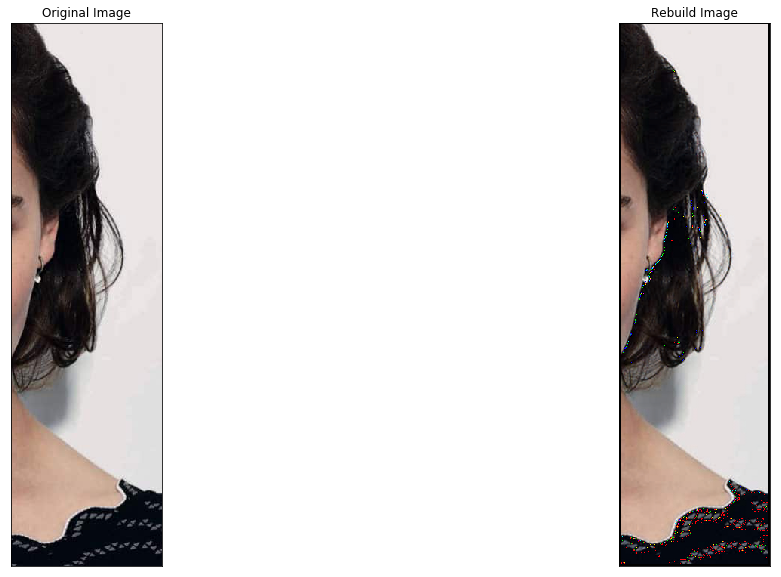

In [17]:
Seconda = Seconda.astype(np.uint8)
img_find_max_min(Seconda)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_invert_color(img.astype(np.uint8)))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,2,2)
plt.title("Rebuild Image")
plt.imshow(img_invert_color(Seconda))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [18]:
Terza = np.zeros((img.shape[0],img.shape[1],img.shape[2]))

irange = range(img.shape[0]-2)[2:]
jrange = range(img.shape[1]-2)[2:]

alpha = (1.0/2)
beta = (5.0/8)
gamma = (3.0/4)

for i in irange:
    for j in jrange:
        if (i+1)%2 is 0:
            if (j+1)%2 is 0:
                #print(i,j)
                #BLUE@BLUE
                Terza[i][j][0] = fd_bp_b[i][j]
                
                DeltaBlue = fd_bp_b[i][j]-(1.0/4)*(fd_bp_b[i+2][j]+fd_bp_b[i-2][j]+fd_bp_b[i][j+2]+fd_bp_b[i][j-2])
                #GREEN@BLUE
                #if fd_bp_g[i][j]+1*(alpha)*DeltaBlue <=255 and fd_bp_g[i][j]+1*(alpha)*DeltaBlue>=0:
                Terza[i][j][1] = fd_bp_g[i][j]+1*(alpha)*DeltaBlue #+1db ch-green ma compaiono puntini verdi
                #RED@BLUE
                #if fd_bp_r[i][j]+1*(gamma)*DeltaBlue <=255 and fd_bp_r[i][j]+1*(gamma)*DeltaBlue>=0:
                Terza[i][j][2] = fd_bp_r[i][j]+1*(gamma)*DeltaBlue #-0.06 ch-red e problemi al cappello
                
            if (j+1)%2 is 1: 
                #print(i,j)
                #GREEN@GREEN
                Terza[i][j][1] = fd_bp_g[i][j]
                DeltaGreen = fd_bp_g[i][j]-(1.0/4)*(fd_bp_g[i+2][j]+fd_bp_g[i-2][j]+fd_bp_g[i][j+2]+fd_bp_g[i][j-2])
                #BLUE@GREEN@BLUEROW
                #if fd_bp_b[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_b[i][j]+1*(beta)*DeltaGreen>=0:
                Terza[i][j][0] = fd_bp_b[i][j]+1*(beta)*DeltaGreen #+0.7db ch-blue
                #RED@GREEN@BLUEROW
                #if fd_bp_r[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_r[i][j]+1*(beta)*DeltaGreen>=0:
                Terza[i][j][2] = fd_bp_r[i][j]+1*(beta)*DeltaGreen #-0.06 ch-red problemi al cappello
                
        if (i+1)%2 is 1:
            if (j+1)%2 is 0:
                #print(i,j)
                #GREEN@GREEN
                Terza[i][j][1] = fd_bp_g[i][j]
                DeltaGreen = fd_bp_g[i][j]-(1.0/4)*(fd_bp_g[i+2][j]+fd_bp_g[i-2][j]+fd_bp_g[i][j+2]+fd_bp_g[i][j-2])
                #Seconda[i][j][1] = Ricostruzione[i][j][1]
                #BLUE@GREEN@REDROW
                #if fd_bp_b[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_b[i][j]+1*(beta)*DeltaGreen>=0:
                Terza[i][j][0] = fd_bp_b[i][j]+1*(beta)*DeltaGreen #+0.61 ch-blue
                #RED@GREEN@REDROW
                #if fd_bp_r[i][j]+1*(beta)*DeltaGreen <=255 and fd_bp_r[i][j]+1*(beta)*DeltaGreen>=0:
                Terza[i][j][2] = fd_bp_r[i][j]+1*(beta)*DeltaGreen #-0.06 ch-red e problemi al cappello

                
            if (j+1)%2 is 1:
                #print(i,j)
                #RED@RED
                Terza[i][j][2] = fd_bp_r[i][j]
                DeltaRed = fd_bp_r[i][j]-(1.0/4)*(fd_bp_r[i+2][j]+fd_bp_r[i-2][j]+fd_bp_r[i][j+2]+fd_bp_r[i][j-2])
                #GREEN@RED
                #if fd_bp_g[i][j]+1*(alpha)*DeltaRed <=255 and fd_bp_g[i][j]+1*(alpha)*DeltaRed>=0:
                Terza[i][j][1] = fd_bp_g[i][j]+1*(alpha)*DeltaRed #+1db ch-green anche se compaiono pixel verdi
                #BLUE@RED
                #if fd_bp_b[i][j]+1*(gamma)*DeltaRed <=255 and fd_bp_b[i][j]+1*(gamma)*DeltaRed>=0:
                Terza[i][j][0] = fd_bp_b[i][j]+1*(gamma)*DeltaRed #+0.7db ch-blue


maxval [255, 255, 255] minval [0, 0, 0]


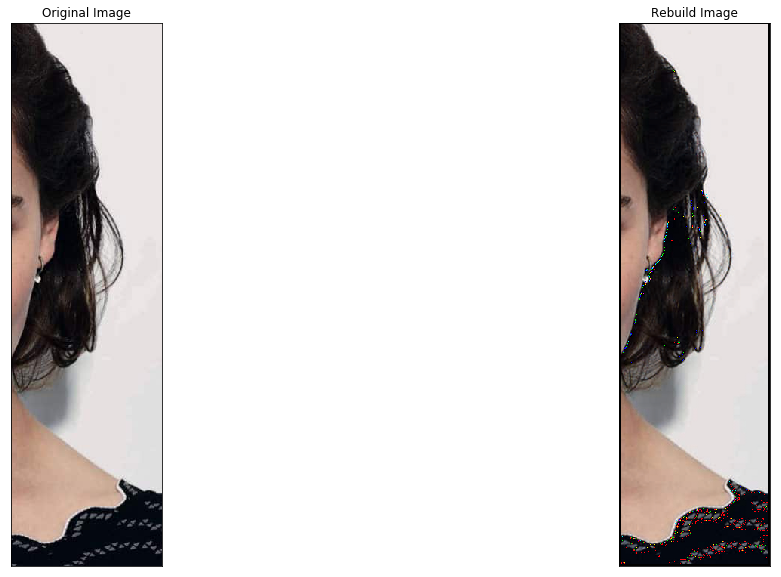

In [19]:
Terza = Terza.astype(np.uint8)
img_find_max_min(Terza)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_invert_color(img.astype(np.uint8)))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,2,2)
plt.title("Rebuild Image")
plt.imshow(img_invert_color(Terza))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()